In [1]:
import os 
import sys
import random
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import lognorm
from scipy.stats import norm 
from scipy import integrate
from scipy.stats import gmean

from scipy.stats import pearsonr

import statsmodels.api as sm 
import statsmodels.formula.api as smf

### src; https://github.com/arkottke/pyrotd
import pyrotd



%load_ext autoreload
%autoreload 2

/Users/laxmandahal/opt/miniconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
gmDir = r'/Users/laxmandahal/Desktop/UCLA/Phd/Research/GM_Selection/Heresi_826_GMs'
heresi_831_rsn = np.loadtxt(os.path.join(gmDir, 'Heresi_831_RSNs.txt'), delimiter=',', dtype='int32')

# rawGMs_dir = os.path.join(baseDir, 'rawGMs')
# os.chdir(rawGMs_dir)
nga2_summary = pd.read_csv(os.path.join(gmDir, 'rawGMs', 'SearchResults_Main_clean.csv'))
nga2_summary.columns = nga2_summary.columns.str.strip()
nga2_rsn = nga2_summary['Record Sequence Number'].values

missing_RSN = []
for i in heresi_831_rsn: 
    if i not in nga2_rsn:
        missing_RSN.append(i)

magnitude = nga2_summary['Magnitude'].values
distance_Rjb = nga2_summary['Rjb (km)'].values
distance_rup = nga2_summary['Rrup (km)'].values
Vs_30 = nga2_summary['Vs30 (m/sec)'].values
nga2_summary.head()

,Result ID,Spectral Ordinate,Record Sequence Number,Mean Squared Error,Scale Factor,Tp-Pulse Period (sec),5-75% Duration (sec),5-95% Duration (sec),Arias Intensity (m/sec),Earthquake Name,...,Magnitude,Mechanism,Rjb (km),Rrup (km),Vs30 (m/sec),Lowest Useable Frequency (Hz),Initial-search Scale Factor,Horizontal-1 Acc. Filename,Horizontal-2 Acc. Filename,Vertical Acc. Filename
0,1,SRSS,9,-,1,-,21.5,37.2,0.1,"""Borrego""",...,6.50,strike slip,56.88,56.88,213.44,0.1250,1,RSN9_BORREGO_B-ELC000.AT2,RSN9_BORREGO_B-ELC090.AT2,RSN9_BORREGO_B-ELC-UP.AT2
1,2,SRSS,12,-,1,-,18.6,33.5,0.1,"""Kern County""",...,7.36,Reverse,114.62,117.75,316.46,0.1250,1,RSN12_KERN.PEL_PEL090.AT2,RSN12_KERN.PEL_PEL180.AT2,RSN12_KERN.PEL_PEL-UP.AT2
2,3,SRSS,30,-,1,-,2.4,7.5,0.9,"""Parkfield""",...,6.19,strike slip,9.58,9.58,289.56,0.1625,1,RSN30_PARKF_C05085.AT2,RSN30_PARKF_C05355.AT2,RSN30_PARKF_C05DWN.AT2
3,4,SRSS,31,-,1,-,5.9,13.1,0.4,"""Parkfield""",...,6.19,strike slip,12.90,12.90,256.82,0.1250,1,RSN31_PARKF_C08050.AT2,RSN31_PARKF_C08320.AT2,RSN31_PARKF_C08DWN.AT2
4,5,SRSS,36,-,1,-,25.0,49.3,0.2,"""Borrego Mtn""",...,6.63,strike slip,45.12,45.66,213.44,0.1000,1,RSN36_BORREGO_A-ELC180.AT2,RSN36_BORREGO_A-ELC270.AT2,RSN36_BORREGO_A-ELC-UP.AT2


In [3]:
nga2_summary.columns

Index(['Result ID', 'Spectral Ordinate', 'Record Sequence Number',
       'Mean Squared Error', 'Scale Factor', 'Tp-Pulse Period (sec)',
       '5-75% Duration (sec)', '5-95% Duration (sec)',
       'Arias Intensity (m/sec)', 'Earthquake Name', 'Year', 'Station Name',
       'Magnitude', 'Mechanism', 'Rjb (km)', 'Rrup (km)', 'Vs30 (m/sec)',
       'Lowest Useable Frequency (Hz)', 'Initial-search Scale Factor',
       'Horizontal-1 Acc. Filename', 'Horizontal-2 Acc. Filename',
       'Vertical Acc. Filename'],
      dtype='object')

/Users/laxmandahal/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/laxmandahal/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/laxmandahal/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg

<AxesSubplot:xlabel='Density', ylabel='Rjb (km)'>

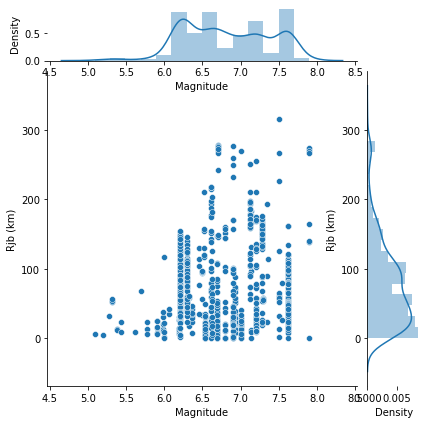

In [4]:
axs = sns.jointplot(data=nga2_summary, x = 'Magnitude', y = 'Rjb (km)')
# axs.ax_joint.scatter('col1', 'col2', data=df2, c='r', marker='x')
# drawing pdf instead of histograms on the marginal axes
axs.ax_marg_x.cla()
axs.ax_marg_y.cla()
sns.distplot(nga2_summary.Magnitude, ax=axs.ax_marg_x)
sns.distplot(nga2_summary['Rjb (km)'], ax=axs.ax_marg_y, vertical=True)

Text(0.5, 42.5, 'Vs30 (m/sec)')

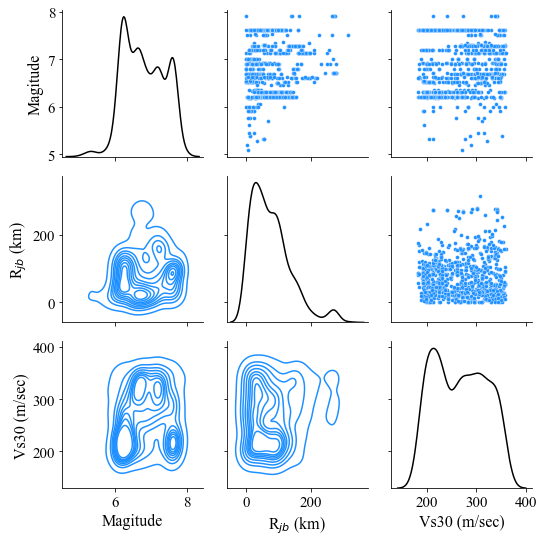

In [5]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.figsize']=(8,8)
ax = sns.PairGrid(nga2_summary[['Magnitude', 'Rjb (km)', 'Vs30 (m/sec)']], diag_sharey=False
                )
ax.map_upper(sns.scatterplot, s=15, color='dodgerblue')
ax.map_lower(sns.kdeplot, fill=False, color = 'dodgerblue')
# g.map_lower(sns.scatterplot)
ax.map_diag(sns.kdeplot, color='k')
ax.axes[0,0].yaxis.set_label_text('Magitude', fontsize=16)
ax.axes[1,0].yaxis.set_label_text(r'R$_{jb}$ (km)', fontsize=16)
ax.axes[2,0].yaxis.set_label_text('Vs30 (m/sec)', fontsize=16)
ax.axes[2,0].xaxis.set_label_text('Magitude', fontsize=16)
ax.axes[2,1].xaxis.set_label_text(r'R$_{jb}$ (km)', fontsize=16)
ax.axes[2,2].xaxis.set_label_text('Vs30 (m/sec)', fontsize=16)
# ax.axes[0,1].set_yticklabels(['Magitude'], fontsize=25)
# ax.axes[0,1].set(xlabel=None)
# plt.savefig(os.path.join(baseDir, 'plots', 'PairGrid_3way.png'))

In [6]:
baseDir = r'/Users/laxmandahal/Desktop/UCLA/Phd/Research/IM_study/Codes'

In [7]:
spectrum_rotd50 = pd.read_csv(os.path.join(gmDir, 'Spectrum_rotD50_period_10s.csv'))
spectrum_rotd50.head()

,Unnamed: 0,Period,GM1_RSN9,GM2_RSN12,GM3_RSN30,GM4_RSN31,GM5_RSN36,GM6_RSN53,GM7_RSN54,GM8_RSN60,...,GM817_RSN8069,GM818_RSN8119,GM819_RSN8130,GM820_RSN8133,GM821_RSN8160,GM822_RSN8161,GM823_RSN8492,GM824_RSN8519,GM825_RSN8522,GM826_RSN8606
0,0,T_0.01,0.052444,0.052799,0.380298,0.248830,0.094259,0.006947,0.009054,0.004360,...,0.082012,0.661447,0.336197,0.086072,0.254774,0.332909,0.099989,0.016741,0.182747,0.271264
1,1,T_0.02,0.052850,0.052902,0.383257,0.254062,0.094724,0.006958,0.009094,0.004423,...,0.083202,0.745802,0.345147,0.086835,0.262038,0.333275,0.100607,0.016755,0.185217,0.273554
2,2,T_0.03,0.053229,0.053148,0.392000,0.267252,0.095473,0.006991,0.009841,0.004691,...,0.087394,0.767578,0.398538,0.089731,0.268640,0.338789,0.104329,0.016786,0.188970,0.280996
3,3,T_0.04,0.054522,0.053885,0.401609,0.272778,0.097072,0.007027,0.009971,0.005936,...,0.093075,0.785275,0.390161,0.090887,0.303930,0.349475,0.107990,0.016834,0.192447,0.284361
4,4,T_0.05,0.061337,0.054389,0.394217,0.297398,0.100190,0.007245,0.010939,0.005171,...,0.090715,0.809312,0.504280,0.090499,0.343487,0.382983,0.116499,0.016889,0.224730,0.299519


In [8]:
period_int = [float(period.split('_')[1]) for period in spectrum_rotd50.Period]
# period_int[:5]

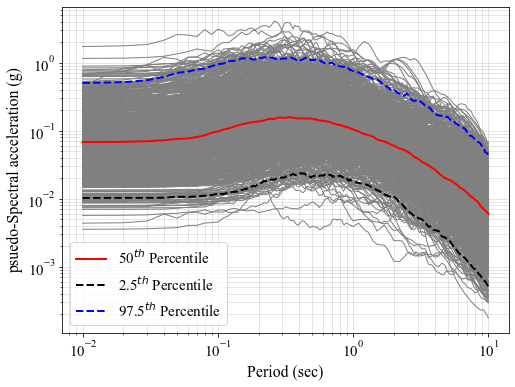

In [9]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.figsize']=(8,6)
for i in range(2, spectrum_rotd50.shape[1]):
#     plt.plot(period_int, spectrum_rotd50.iloc[:,i], linewidth=1, color='grey')
    plt.loglog(period_int, spectrum_rotd50.iloc[:,i], linewidth=1, color='grey')
# plt.plot(period_int, spectrum_rotd50.iloc[:,2:].median(axis=1), linewidth=2, color='r', label='Median' )
plt.plot(period_int, spectrum_rotd50.iloc[:,2:].quantile(q=0.5, axis=1), linewidth=2,
         color='r', label=r'50$^{th}$ Percentile')
plt.plot(period_int, spectrum_rotd50.iloc[:,2:].quantile(q=0.025, axis=1), linewidth=2,
         linestyle='dashed', color='k', label=r'2.5$^{th}$ Percentile')
plt.plot(period_int, spectrum_rotd50.iloc[:,2:].quantile(q=0.975, axis=1), linewidth=2,
         linestyle='dashed', color='b', label=r'97.5$^{th}$ Percentile')
plt.xlabel('Period (sec)', fontsize=16)
plt.ylabel('psuedo-Spectral acceleration (g)', fontsize=16)
plt.legend(fontsize=15)
plt.grid(c='k', which='both', alpha=0.13)
# plt.savefig(os.path.join(baseDir, 'plots', 'spectrum_all_GMs.png'))

In [10]:
absDir = r'/Users/laxmandahal/Desktop/UCLA/Phd/Research/IM_study'
with open(os.path.join(absDir, 'Codes','BuildingNames.txt'), 'r') as f:
    BuildingList = f.read() 
BuildingList = BuildingList.split('\n')
BuildingList

['s1_48x32_high',
 's1_48x32_veryhigh',
 's1_96x48_high',
 's1_96x48_veryhigh',
 's2_48x32_high',
 's2_48x32_veryhigh',
 's2_96x48_high',
 's2_96x48_veryhigh',
 's4_96x48_high',
 's4_96x48_veryhigh']

In [11]:
T = np.array([0.13, 0.12, 0.16, 0.15, 0.22, 0.22, 0.26, 0.25, 0.49, 0.49])
numGM = 826
g = 980.665 ## converts GM record to cm/sec^2

def compute_RotDxx_EDP(edpX, edpZ, percentile = 50):
    angles = np.arange(0, 180, step=1)
    radians = np.radians(angles)
    coeffs = np.c_[np.cos(radians), np.sin(radians)]
    
    edp_stacked = np.vstack([edpX, edpZ])
    rotated_edp = np.dot(coeffs, edp_stacked)
    percentile_edp = np.percentile(rotated_edp, q = percentile, axis = 0, interpolation='linear')
    return percentile_edp

In [29]:
def plot_edp_profile(baseDir, BuildingList, buildingIndex, pairingID=1,
                     combine_pairingIDs=False,
                     combine_biDirectional_edp=False, 
                     save_fig=False,
                    fileName='EDP_profile'
                    ):
    numStory = int(BuildingList[buildingIndex].split('_')[0][1])
#     floor = np.arange(1, numStory + 1)
#     baseDir = r'/Users/laxmandahal/Desktop/UCLA/Phd/Research/IM_study'
    dataDir = os.path.join(baseDir, *['Results', 'IM_study_826GMs', BuildingList[buildingIndex]])

    sdr = pd.read_csv(os.path.join(dataDir, 'SDR.csv'), header = None)
    pfa = pd.read_csv(os.path.join(dataDir, 'PFA.csv'), header = None)
    
    if pairingID == 1:
        start_index_multiplier = 0
        end_index_multiplier = 1
    else:
        start_index_multiplier = 2
        end_index_multiplier = 3
        
    plotting_sdrX = []
    plotting_sdrZ = []
    plotting_pfaX = []
    plotting_pfaZ = []
    plotting_sdr_RotD50 = []
    plotting_pfa_RotD50 = []

    for i in range(numStory):

        if combine_pairingIDs:
            sdrX = gmean([sdr[3+i].values[0:numGM], sdr[3+i].values[numGM*2:numGM*3]])
            sdrZ = gmean([sdr[3+i].values[numGM:numGM*2], sdr[3+i].values[numGM*3:numGM*4]])
            
            if i == 0:
                pfaX = gmean([pfa[3+i].values[0:numGM], pfa[3+i].values[numGM*2:numGM*3]])
                pfaZ = gmean([pfa[3+i].values[numGM:numGM*2], pfa[3+i].values[numGM*3:numGM*4]])
                plotting_pfaX.append(max(pfaX))
                plotting_pfaZ.append(max(pfaZ))
                if combine_biDirectional_edp:
                    pfa_rotd50_level_0 = compute_RotDxx_EDP(pfaX, pfaZ, percentile=50)
                    plotting_pfa_RotD50.append()
            pfaX = gmean([pfa[4+i].values[0:numGM], pfa[4+i].values[numGM*2:numGM*3]])
            pfaZ = gmean([pfa[4+i].values[numGM:numGM*2], pfa[4+i].values[numGM*3:numGM*4]])
        else:   
            sdrX = sdr[3+i].values[numGM * start_index_multiplier : numGM * end_index_multiplier]
            sdrZ = sdr[3+i].values[numGM * end_index_multiplier : numGM * (end_index_multiplier + 1)]
            if i == 0:
                pfaX = pfa[3+i].values[numGM * start_index_multiplier : numGM * end_index_multiplier]
                pfaZ = pfa[3+i].values[numGM * end_index_multiplier : numGM * (end_index_multiplier + 1)]
                plotting_pfaX.append(max(pfaX))
                plotting_pfaZ.append(max(pfaZ))
                if combine_biDirectional_edp:
                    pfa_rotd50_level_0 = compute_RotDxx_EDP(pfaX, pfaZ, percentile=50)
                    plotting_pfa_RotD50.append()
            pfaX = pfa[4+i].values[numGM * start_index_multiplier : numGM * end_index_multiplier]
            pfaZ = pfa[4+i].values[numGM * end_index_multiplier : numGM * (end_index_multiplier + 1)]
            
        if combine_biDirectional_edp:
            sdr_rotd50 = compute_RotDxx_EDP(sdrX, sdrZ, percentile=50)
            pfa_rotd50 = compute_RotDxx_EDP(pfaX, pfaZ, percentile=50)
            plotting_pfa_RotD50.append(pfa_rotd50)
            plotting_sdr_RotD50.append(sdr_rotd50)
            
        plotting_sdrX.append(max(sdrX))
        plotting_sdrZ.append(max(sdrZ))
        plotting_pfaX.append(max(pfaX))
        plotting_pfaZ.append(max(pfaZ))
    
    if combine_biDirectional_edp:
#         fileName = 'RotEDP_RotD50'
        fig, axs = plt.subplots(1, 2, figsize=(10,6), sharey = True)
        plt.rcParams["font.family"] = "Times New Roman"
        plt.rcParams['xtick.labelsize'] = 15
        plt.rcParams['ytick.labelsize'] = 15
        
        axs[0].step([0] + plotting_sdr_RotD50, np.arange(0, numStory+1), linewidth=1.75, color='darkorange',
                   label='SDR')
        axs[0].set_yticks(np.arange(1, numStory+1))
        axs[0].set_xlabel('SDR', fontsize = 16)
        axs[0].set_ylabel('Floor Level', fontsize = 16)
        axs[1].step(plotting_pfa_RotD50, np.arange(0, numStory+1), linewidth=1.75, color='dodgerblue',
                   label='PFA')
        axs[1].set_yticks(np.arange(0, numStory+1))
        axs[1].set_xlabel('PFA', fontsize = 16)
        axs[1].set_ylabel('Floor Level', fontsize = 16)
    else:
#         fileName = 'AvgEDP_RotD50'
#         fig, axs = plt.subplots(2, 2, figsize=(10,12), sharey = False)
        fig, axs = plt.subplots(2, 1, figsize=(6,10), sharey = False)
        plt.rcParams["font.family"] = "Times New Roman"
        plt.rcParams['xtick.labelsize'] = 15
        plt.rcParams['ytick.labelsize'] = 15
        axs[0].step([0]+plotting_sdrX, np.arange(0, numStory+1), linewidth=1.75, color='darkorange',
                   label='SDR', where='pre')
        axs[0].set_yticks(np.arange(0, numStory+1))
        axs[0].set_xlabel(r'SDR$_X$ (%)', fontsize = 16)
        axs[0].set_ylabel('Floor Level', fontsize = 16)
        
        axs[1].step(plotting_pfaX, np.arange(0, numStory+1), linewidth=1.75, color='dodgerblue',
                   label='PFA', where='pre')
        axs[1].set_yticks(np.arange(0, numStory+1))
        axs[1].set_xlabel(r'PFA$_X$ (g)', fontsize = 16)
        axs[1].set_ylabel('Floor Level', fontsize = 16)
        
#         axs[0, 0].step([0]+plotting_sdrX, np.arange(0, numStory+1), linewidth=1.75, color='darkorange',
#                    label='SDR', where='pre')
#         axs[0, 0].set_yticks(np.arange(0, numStory+1))
#         axs[0, 0].set_xlabel('SDR X (%)', fontsize = 16)
#         axs[0, 0].set_ylabel('Floor Level', fontsize = 16)
#         axs[1, 0].step([0]+plotting_sdrZ, np.arange(0, numStory+1), linewidth=1.75, color='darkorange',
#                    label='SDR', where='pre')
#         axs[1, 0].set_yticks(np.arange(0, numStory+1))
#         axs[1, 0].set_xlabel('SDR Z (%)', fontsize = 16)
#         axs[1, 0].set_ylabel('Floor Level', fontsize = 16)
#         axs[0, 1].step(plotting_pfaX, np.arange(0, numStory+1), linewidth=1.75, color='dodgerblue',
#                    label='PFA', where='pre')
#         axs[0, 1].set_yticks(np.arange(0, numStory+1))
#         axs[0, 1].set_xlabel('PFA X (g)', fontsize = 16)
#         axs[0, 1].set_ylabel('Floor Level', fontsize = 16)
#         axs[1, 1].step(plotting_pfaZ, np.arange(0, numStory+1), linewidth=1.75, color='dodgerblue',
#                    label='PFA', where='pre')
#         axs[1, 1].set_yticks(np.arange(0, numStory+1))
#         axs[1, 1].set_xlabel('PFA Z (g)', fontsize = 16)
#         axs[1, 1].set_ylabel('Floor Level', fontsize = 16)
    if save_fig:
        plt.savefig(os.path.join(baseDir, 'Codes', 'plots', '%s_%s.png'%(fileName, BuildingList[buildingIndex])), 
                    bbox_inches="tight")
    else:
        plt.show()

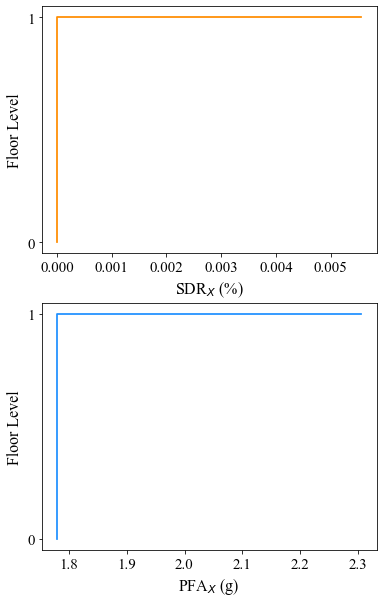

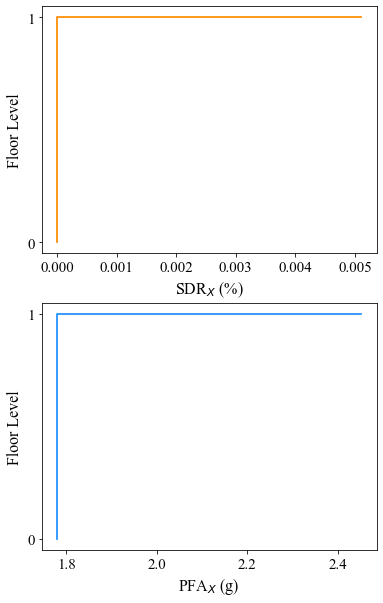

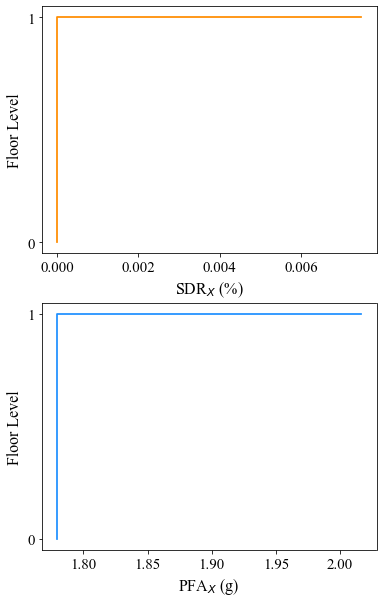

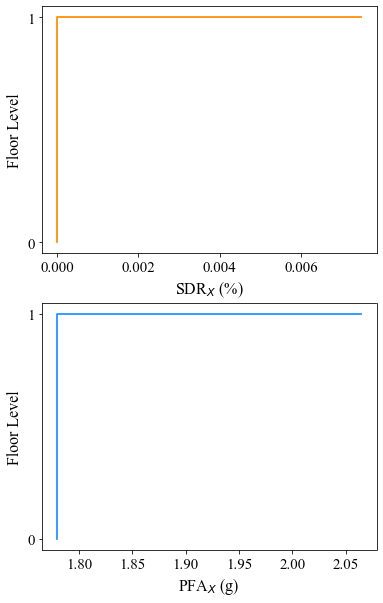

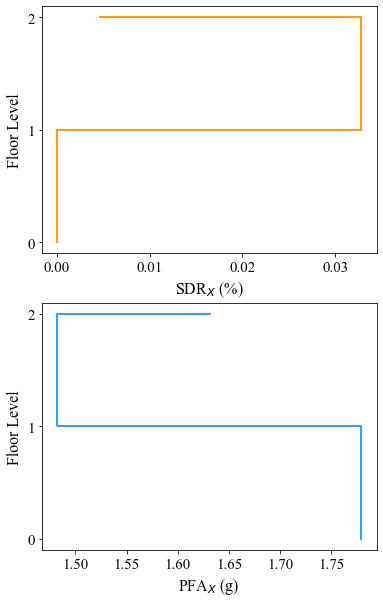

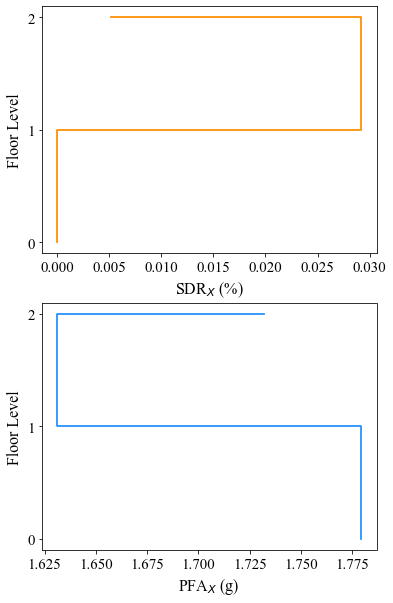

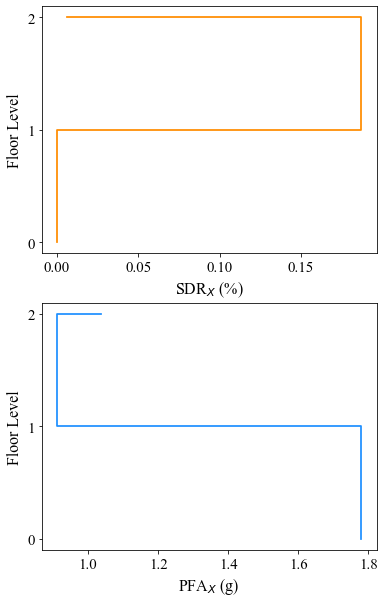

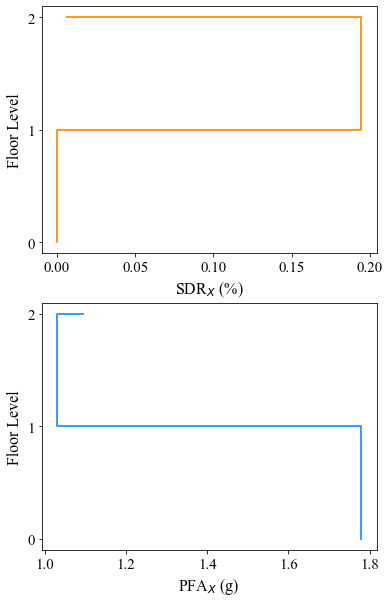

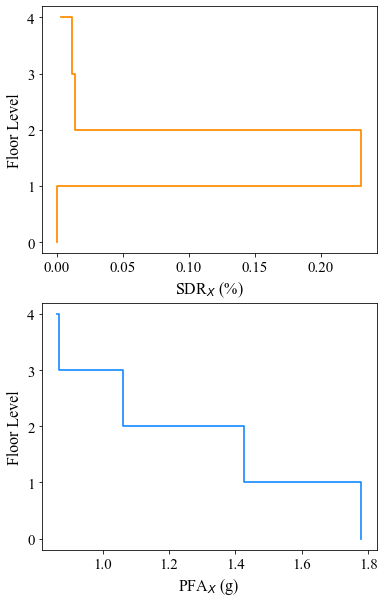

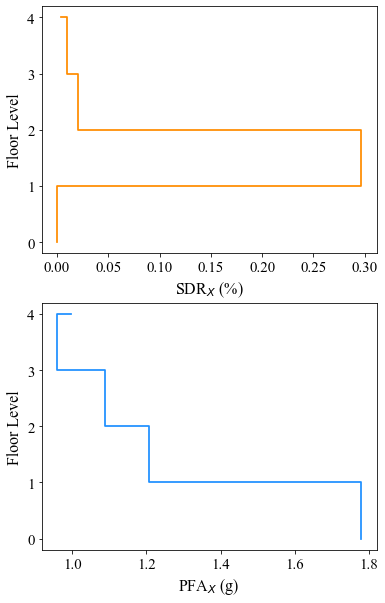

In [26]:
for i in range(len(BuildingList)):
    plot_edp_profile(absDir, BuildingList, i, pairingID=1,
                     combine_pairingIDs=False,
                     combine_biDirectional_edp=False, 
                 save_fig=False
                    )

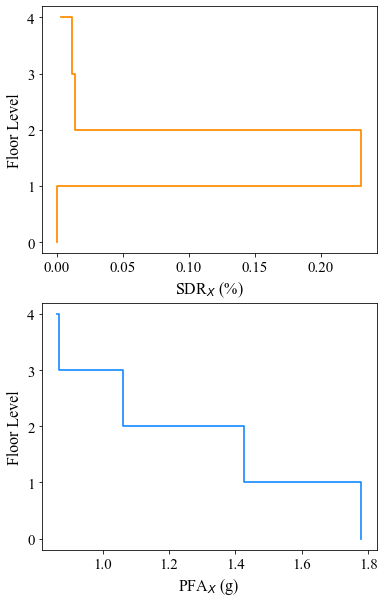

In [30]:
plot_edp_profile(absDir, BuildingList, 8, pairingID=1,
                     combine_pairingIDs=False,
                     combine_biDirectional_edp=False, 
                 save_fig=True,
                fileName='EDP_profile')

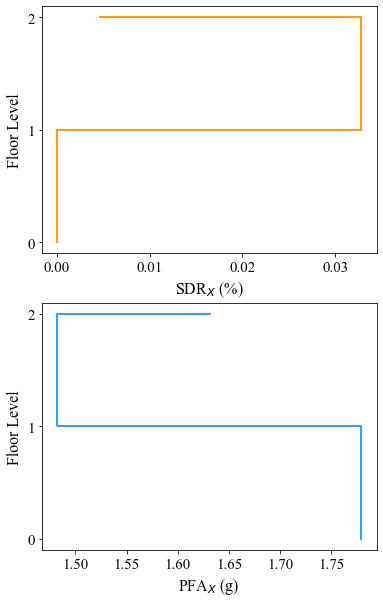

In [31]:
plot_edp_profile(absDir, BuildingList, 4, pairingID=1,
                     combine_pairingIDs=False,
                     combine_biDirectional_edp=False, 
                 save_fig=True,
                fileName='EDP_profile')